In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph

## Needed packages:

!pip install python-igraph

!pip install pycairo (Might need to install it using conda and not pip.)

## Converting from networkx to igraph

In [3]:
G = nx.barabasi_albert_graph(100, m = 1, initial_graph = None)           #Generates Barabási-albert graph.
print(nx.info(G))

Graph with 100 nodes and 99 edges


In [4]:
g = igraph.Graph.from_networkx(G)                                         #Converts networkx graph to igraph graph.

In [5]:
print(g)                                                                  #Checks graph attributes and data.

IGRAPH U--- 100 99 --
+ attr: _nx_name (v)
+ edges:
0--1 0--18 1--2 1--3 1--4 1--5 1--6 1--7 1--8 1--9 1--10 1--11 1--14 1--15
1--17 1--19 1--20 1--22 1--26 1--29 1--32 1--33 1--40 1--42 1--43 1--46 1--47
1--55 1--65 1--66 1--73 1--76 1--77 1--80 1--84 1--89 1--92 1--93 1--95 1--96
4--12 4--21 4--24 4--30 4--37 5--25 5--50 5--94 7--27 7--57 7--62 8--13 8--35
8--36 8--51 10--28 10--38 10--56 10--61 12--52 13--16 13--63 14--23 14--44
16--53 16--64 19--34 20--71 23--54 24--31 25--69 25--82 26--45 26--70 26--85
27--99 28--49 31--87 31--91 32--68 35--39 35--41 35--48 36--58 40--67 40--75
44--79 44--83 45--60 49--72 50--97 57--59 57--74 63--88 63--90 66--78 79--81
82--86 82--98


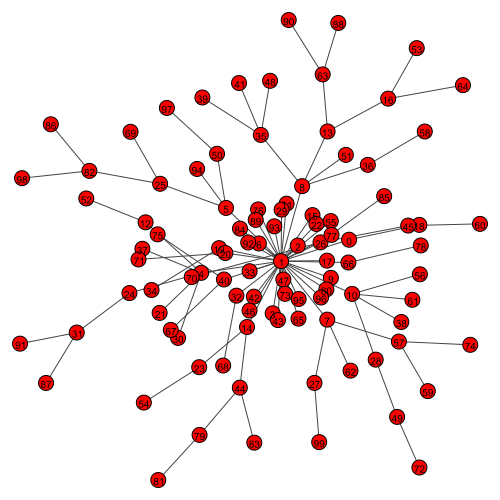

In [6]:
vs = igraph.VertexSeq(g)                                                  #Loads node attributes.
es = igraph.EdgeSeq(g)                                                    #Loads edge atrributes.
igraph.plot(g, "graph.png", vertex_size = 15, edge_width = 1, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (500, 500))

# Community detection

In [7]:
G = nx.karate_club_graph()                                                 #Generates the famous Zachary Karate Club graph.
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [8]:
g = igraph.Graph.from_networkx(G)

## 1. Girvan-Newman method (showcasing the main methods)

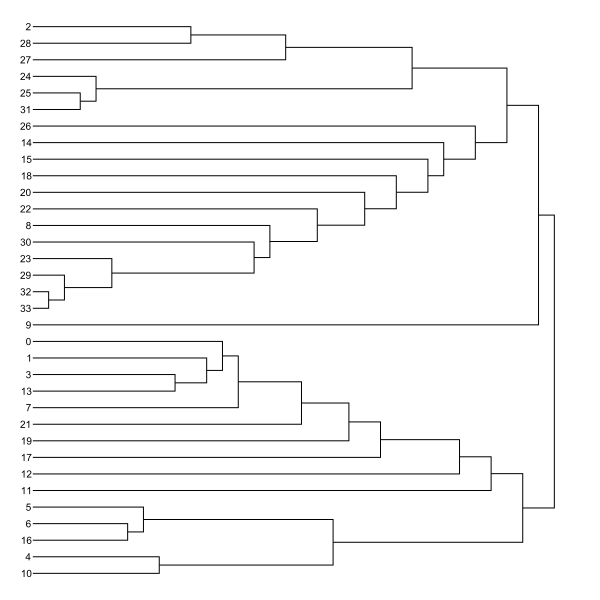

In [9]:
d = g.community_edge_betweenness()                                        #Does Girvan-Newman method.
igraph.plot(d)                                                            #Plots dendrogram.

In [14]:
ggirv = d.as_clustering()                                                     #Creates graph object from community finding clustering.
print(ggirv)                                                                  #Prints the community structure.
print("Modularity:", g.modularity(ggirv))                                     #Prints the modularity score.
print("Number of communities found:", max(ggirv.membership) + 1)              #Prints the number of detected communities.

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9
Modularity: 0.40129848783694944
Number of communities found: 5


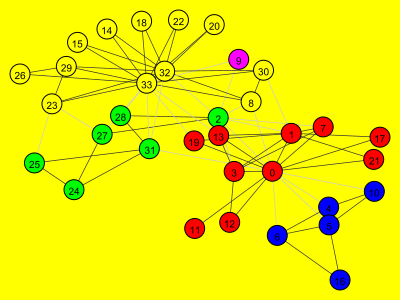

In [11]:
#The obtained graph that contains the communities can be passed into the plot. Edges between members of a community are wider.

vs = igraph.VertexSeq(g)
es = igraph.EdgeSeq(g)
igraph.plot(ggirv, vertex_size = 20, edge_width = 0.7, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (400,300), background="yellow")

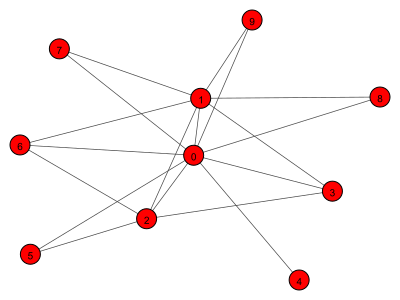

In [12]:
#You can plot the detected communities separately since they are subgraphs of the original one.

igraph.plot(ggirv.subgraph(0), vertex_size = 20, edge_width = 0.7, vertex_label = g.vs["_nx_name"], vertex_label_size=10, bbox = (400,300))

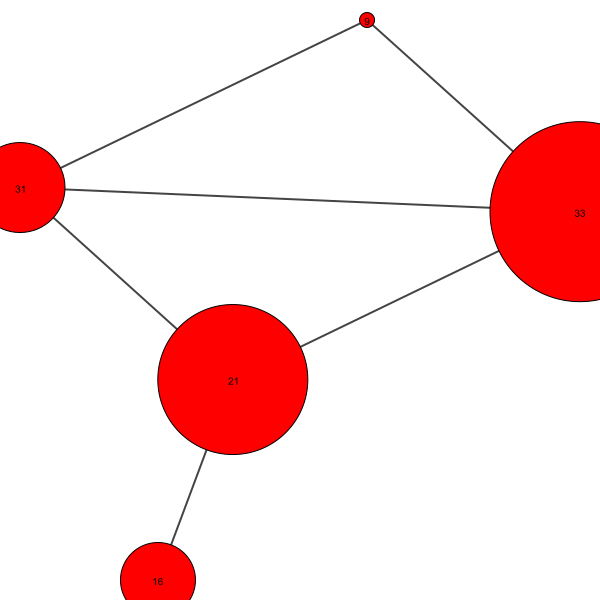

In [13]:
clustg = ggirv.cluster_graph(combine_vertices = "max")        #Creates nodes from communities. Provides good visualization while having thousands of nodes.
                                                              #Can also be made to inherit the attributes of the original graph. (Like here, it will give 
                                                              #the maximum of the node attributes in the given cluster.)
vs = igraph.VertexSeq(clustg)                                 #Loads in the attributes of the vertices of the clustered graph.
es = igraph.EdgeSeq(clustg)                                   #Loads in the attributes of the edges of the original graph.
vertexsize = []                                               #Stores the sizes of the clusters in a list.
for i in range(len(ggirv)):
    vertexsize.append(len(ggirv[i]))                          #Let the node size be 15 times the number of nodes the cluster contains.

igraph.plot(clustg, vertex_size = np.array(vertexsize) * 15, edge_width = 2, vertex_label = clustg.vs["_nx_name"], vertex_label_size=10, bbox = (600, 600)) 

## 2. Other community detection methods

Newman Eigen vector method: g.community_leading_eigenvector()

Label propagation: g.community_label_propagation()

Infomap method: g.community_infomap()

Louvain method: g.community_multilevel()

Leiden method: g. community_leiden(resolution_parameter = 0.00045)

Random walk method (walktrap): g.community_walktrap(steps = 18)

Fast-greedy method: g.community_fastgreedy()

    
Some of them immediately create an object like "ggirv", thus there is no need to use the as_clustering() function sometimes.